In [242]:
import  pandas as pd
import  numpy as np
train=pd.read_csv('smallTrain.csv')

In [3]:
train.head(10)

,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,channel,...,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster,year,month,day
0,2,3,66,348,48862,2234.2641,12,0,1,9,...,1,0,3,2,50,628,1,2014,8,11
1,2,3,66,348,48862,2234.2641,12,0,1,9,...,1,1,1,2,50,628,1,2014,8,11
2,2,3,66,348,48862,2234.2641,12,0,0,9,...,1,0,1,2,50,628,1,2014,8,11
3,2,3,66,442,35390,913.1932,93,0,0,3,...,1,0,1,2,50,1457,80,2014,8,9
4,2,3,66,442,35390,913.6259,93,0,0,3,...,1,0,1,2,50,1457,21,2014,8,9
5,2,3,66,442,35390,911.5142,93,0,0,3,...,1,0,1,2,50,1457,92,2014,8,9
6,2,3,66,189,10067,-13.0000,501,0,0,2,...,1,0,2,2,50,675,41,2014,7,16
7,2,3,66,189,10067,-13.0000,501,0,1,2,...,1,0,1,2,50,675,41,2014,7,16
8,2,3,66,189,10067,-13.0000,501,0,0,2,...,1,0,1,2,50,675,69,2014,7,16
9,2,3,66,189,10067,-13.0000,501,0,0,2,...,1,0,1,2,50,675,70,2014,7,16


In [243]:
y=train['hotel_cluster']
train=train.drop('hotel_cluster',axis=1)
train=train.drop('orig_destination_distance',axis=1)

In [5]:
train.shape

(100000, 24)

In [6]:
#copy pasted from google 
from math import factorial
def combination(n,k):
    numerator=factorial(n)
    denominator=(factorial(k)*factorial(n-k))
    answer=numerator/denominator
    return answer

In [7]:
combination(4,3)

4.0

In [8]:
N=train.shape[1]

In [9]:
N

24

In [10]:
import itertools

In [11]:
#GENERATING ALL COMBINATIONS  - willl  bring  back     3D indexes of column  names
comb=itertools.combinations(range(N), 3)
idx=[ elem   for  elem in  comb]

print(len(idx))


2024


In [12]:
from random import randrange
random_index = randrange(0,len(idx))
random_joint=idx[random_index]

In [13]:
random_joint=np.array(random_joint)
random_joint

array([13, 18, 21])

In [14]:
names=train.columns
names

Index(['site_name', 'posa_continent', 'user_location_country',
       'user_location_region', 'user_location_city', 'user_id', 'is_mobile',
       'is_package', 'channel', 'srch_ci', 'srch_co', 'srch_adults_cnt',
       'srch_children_cnt', 'srch_rm_cnt', 'srch_destination_id',
       'srch_destination_type_id', 'is_booking', 'cnt', 'hotel_continent',
       'hotel_country', 'hotel_market', 'year', 'month', 'day'],
      dtype='object')

In [15]:
names_subset=names[list(random_joint)]

In [16]:
tr=train[['is_mobile', 'srch_rm_cnt', 'hotel_continent']]
tr.head(3)

,is_mobile,srch_rm_cnt,hotel_continent
0,0,1,2
1,0,1,2
2,0,1,2


In [231]:
from collections import Counter
class featuresfrom3d(object):
    def __init__(self,data):
        """ init   class  with  3D  DATA FRAME  and  other  data  members  needed"""
        self.data=data
        # unique   categories for  the  3 features
        self.u1=None
        self.u2=None
        self.u3=None
        #names  for   easy call   of the columns
        self.name1=self.data.columns[0]
        self.name2=self.data.columns[1]
        self.name3=self.data.columns[2]
        #mapping     features
        self.u1_mapping=None
        self.u2_mapping=None
        self.u3_mapping=None
        #dimmensions  of    the   3D joint probability distro is    basically  the  cardinality of the   categories
        self.dimmension_x=None
        self.dimmension_y=None
        self.dimmension_z=None
        #set prob_space
        self.prob_space=None
        #the joint  distribution   of the   3  randomly choosen features
        self.joint_prob_table=None
    def  unique_cat(self):
        """ get unique   categories   for  the    3 columns as list"""
        self.u1=list(np.unique(self.data[self.name1]))
        
        self.u2=list(np.unique(self.data[self.name2]))
        
        self.u3=list(np.unique(self.data[self.name3]))
        #after   computing the unique categories   will  add also    dimmensions of lego ,, cube''
        self.dimmension_x=len(self.u1)
        self.dimmension_y=len(self.u2)
        self.dimmension_z=len(self.u3)
        self.joint_prob_table=np.zeros((self.dimmension_x,self.dimmension_y,self.dimmension_y))
    def mapping(self):
        """maps  with indexes  the        data  members    with   3 unique   values in order  to put   them  
         in  a     3 dimmensional    lego """
        
        self.u1_mapping={label:index
           for  index,label in  enumerate(self.u1)}
        
        self.u2_mapping={label:index
           for  index,label in  enumerate(self.u2)}
        
        self.u3_mapping={label:index
           for  index,label in  enumerate(self.u3)}
    def probspace(self):
        """ Generates  probability  space
        Here   is the    most  time extensive part , but   with  COunter   it is  solving in less  then  a second 
        """
        data=np.array(self.data)
        tuples = [tuple(row) for row in data]
        #get  frequency  for  each row   , Counter  fast  enough   for  our   task 
        frequency_of_rows=Counter(tuples)
        
        
        probs={key:value/self.data.shape[0] for key,value in frequency_of_rows.items()}
        self.prob_space=probs
        #return  probs
    
    def  create_joint_3dtable(self):
        for  x,y,z in self.prob_space:
            self.joint_prob_table[self.u1_mapping[x],
                                   self.u2_mapping[y],
                                   self.u2_mapping[z]]=self.prob_space[(x,y,z)]
                
        
        
    def  conditioning1(self):
        """ here      we query in the following    way   what  is  prob  of    happening  event in column  3
          given  columns 1 ,  obviously  ,  should  marginalize  column2 ( index  1  in our   geometric thing)"""
        joint_prob_col_2 = self.joint_prob_table.sum(axis=1)
        feature1_train=[]
        for i in  range(self.data.shape[0]):
 
            query=joint_prob_col_2[
                self.u1_mapping[self.data[self.data.columns[0]][i]],
                self.u3_mapping[self.data[self.data.columns[2]][i]]]
            feature1_train.append(query)
        return feature1_train
        
            
            
            
    def  conditioning2(self):
        
        joint_prob_col_2 = self.joint_prob_table.sum(axis=0)
        feature2_train=[]
        for i in  range(self.data.shape[0]):
 
            query=joint_prob_col_2[
                self.u2_mapping[self.data[self.data.columns[1]][i]],
                self.u3_mapping[self.data[self.data.columns[2]][i]]]
            feature2_train.append(query)
        return feature2_train
        
    def  conditioning3(self):
        joint_prob_col_3 = self.joint_prob_table.sum(axis=2)
        feature3_train=[]
        for i in  range(self.data.shape[0]):
 
            query=joint_prob_col_3[
                self.u1_mapping[self.data[self.data.columns[0]][i]],
                self.u2_mapping[self.data[self.data.columns[1]][i]]]
            feature3_train.append(query)
        return feature3_train
        
 
    def  conditioning4(self):
        a=1
        #to seee if  mackes  sense 
 
class  GenerateFeatures(featuresfrom3d):
    def __init__(self,N_COLUMNS,data):
        """  INHERITS   EVERYTHING FROM   FEATURESFROM3D CLASS"""
        self.N_COLUMNS=N_COLUMNS
        self.features_train=np.empty([data.shape[0], N_COLUMNS])
        
        featuresfrom3d.__init__(self,data)
        featuresfrom3d.unique_cat(self)
        featuresfrom3d.mapping(self)
        featuresfrom3d.probspace(self)
        featuresfrom3d.create_joint_3dtable(self)
        f3=np.array(featuresfrom3d.conditioning3(self))
        f1=np.array(featuresfrom3d.conditioning1(self))
        f2=np.array(featuresfrom3d.conditioning2(self))
        self.features_train[:,0]=f1
        self.features_train[:,1]=f2
        self.features_train[:,2]=f3
        
        
        

In [232]:
g=GenerateFeatures(3,tr)

In [235]:
g.features_train.shape

(100000, 3)

In [203]:
s.mapping()
 

In [204]:
 
s.probspace()
 
s.create_joint_3dtable()
 

In [244]:
train=np.array(train)

In [245]:
y=np.array(y)

In [273]:
train=np.hstack((train,g.features_train))

In [248]:
import xgboost   as xgb
xgb=xgb.XGBRegressor(n_estimators=1)


In [249]:
from sklearn.ensemble import   RandomForestRegressor

In [281]:
forest=RandomForestRegressor(n_estimators=1)

In [282]:
forest.fit(train,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=1, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [283]:
importances = forest.feature_importances_

In [284]:
importances

array([ 0.01424993,  0.00541522,  0.02160203,  0.07554623,  0.10334585,
        0.1102062 ,  0.00578373,  0.01664082,  0.04078824,  0.        ,
        0.        ,  0.02800599,  0.02184115,  0.00446753,  0.08663184,
        0.02205145,  0.01756117,  0.09538437,  0.00158359,  0.02320067,
        0.08163287,  0.0140735 ,  0.06540478,  0.11488744,  0.00905658,
        0.01019727,  0.01044156])

In [285]:
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

Feature ranking:
1. feature 23 (0.114887)
2. feature 5 (0.110206)
3. feature 4 (0.103346)
4. feature 17 (0.095384)
5. feature 14 (0.086632)
6. feature 20 (0.081633)
7. feature 3 (0.075546)
8. feature 22 (0.065405)
9. feature 8 (0.040788)
10. feature 11 (0.028006)
11. feature 19 (0.023201)
12. feature 15 (0.022051)
13. feature 12 (0.021841)
14. feature 2 (0.021602)
15. feature 16 (0.017561)
16. feature 7 (0.016641)
17. feature 0 (0.014250)
18. feature 21 (0.014074)
19. feature 26 (0.010442)
20. feature 25 (0.010197)
21. feature 24 (0.009057)
22. feature 6 (0.005784)
23. feature 1 (0.005415)
24. feature 13 (0.004468)
25. feature 18 (0.001584)
26. feature 9 (0.000000)
27. feature 10 (0.000000)


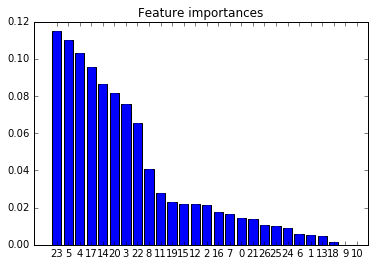

In [286]:
# Print the feature ranking
%matplotlib inline
import  matplotlib
from  matplotlib  import  pyplot  as  plt
print("Feature ranking:")

for f in range(train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(train.shape[1]), importances[indices],
       color="blue", yerr=std[indices], align="center")
plt.xticks(range(train.shape[1]), indices)
plt.xlim([-2, train.shape[1]])
plt.show()


In [274]:
train.shape

(100000, 27)

In [272]:
train

array([[   2,    3,   66, ..., 2014,    8,   11],
       [   2,    3,   66, ..., 2014,    8,   11],
       [   2,    3,   66, ..., 2014,    8,   11],
       ..., 
       [  37,    1,   69, ..., 2013,    4,    1],
       [  37,    1,   69, ..., 2013,    4,    1],
       [  37,    1,   69, ..., 2013,    4,    1]])